In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras.regularizers import l2  # Import L2 regularization
import pandas as pd
# Load the dataset
Data = pd.read_csv('DualBypass.csv')

In [2]:
Data.head()

,BPR1,BPR2,PR_HPC,PR_IPC,PR_LPC,TIT,TSCOR,TSF,TSFC,TSNoxR,SFC
0,0.2059,0.2059,5.891,4.540,4.202,2021,0.03402,118.5,99.97,0.1805,0.1200
1,0.2058,0.2058,5.890,4.539,4.201,2021,0.03397,118.9,99.71,0.1800,0.1196
2,0.0500,0.5707,8.253,2.000,7.505,2194,0.02799,124.8,99.94,0.1795,0.1199
3,0.2058,0.2058,5.888,4.538,4.201,2021,0.03392,119.2,99.44,0.1795,0.1193
4,0.2057,0.2057,5.887,4.537,4.200,2021,0.03387,119.6,99.18,0.1791,0.1190


In [3]:
import numpy as np

# Assuming Data is your dataset

# Generate synthetic data with 50 points
X = Data[['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT']].values

# Filter out bad data for TSFC, TSNoxR, and SFC
mask = np.all(np.isfinite(Data[['TSFC', 'TSNoxR', 'SFC']].values), axis=1)
y = Data[mask][['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC']].values

In [4]:

# Clean X by removing rows with bad data
X = X[mask]

# Clean y by removing rows with bad data
y = y[mask]

In [5]:

# Normalize the input and output variables
scaler_x = StandardScaler()
inputs_norm = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
outputs_norm = scaler_y.fit_transform(y)



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_norm, outputs_norm, test_size=0.2, random_state=20)


In [7]:

from keras.optimizers import Adam
#500 300 200 epoch=100 #random state 20

# Define the Multi-Output MLP Regressor model with Dropout and L2 regularization
model_regularized_dropout = Sequential()
model_regularized_dropout.add(Dense(25
                                    ,input_dim=X.shape[1], activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(25
                                    , activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(25
                                    ,activation='relu'))  # LSM

model_regularized_dropout.add(Dense(5))  # Output layer with 2 units for two target variables


D:\anaconda-3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model with mean squared error loss and Adam optimizer with custom learning rate
adam = Adam(learning_rate=1e-4)

model_regularized_dropout.compile(loss='mean_squared_error', optimizer=adam)

# Train the model with Dropout and L2 regularization
history_cc=model_regularized_dropout.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test),
                              batch_size=32, verbose=1, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0364 - val_loss: 0.9950
Epoch 2/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0304 - val_loss: 0.8908
Epoch 3/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8557 - val_loss: 0.8052
Epoch 4/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8073 - val_loss: 0.7339
Epoch 5/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6961 - val_loss: 0.6713
Epoch 6/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6686 - val_loss: 0.6041
Epoch 7/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5654 - val_loss: 0.5274
Epoch 8/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5095 - val_loss: 0.4435
Epoch 9/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4133 - val_loss: 0.3670
Epoch 10/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3376 - val_loss: 0.3043
Epoch 11/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2885 - val_loss: 0.2537
Epoch 12/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230 - val_loss: 0.0237
Epoch 70/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0258 - val_loss: 0.0227
Epoch 71/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0227 - val_loss: 0.0221
Epoch 72/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224 - val_loss: 0.0211
Epoch 73/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 - val_loss: 0.0205
Epoch 74/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - val_loss: 0.0199
Epoch 75/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0191
Epoch 76/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0185
Epoch 77/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0183
Epoch 78/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0175
Epoch 79/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0173 - val_loss: 0.0170
Epoch 80/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 138/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 139/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 140/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 141/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 142/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 143/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 144/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 145/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 146/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 147/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 148/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9906e-04 - val_loss: 8.9682e-04
Epoch 205/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 9.7090e-04
Epoch 206/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 8.6931e-04
Epoch 207/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3022e-04 - val_loss: 0.0010
Epoch 208/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 8.2654e-04
Epoch 209/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1989e-04 - val_loss: 8.4930e-04
Epoch 210/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8109e-04 - val_loss: 8.2139e-04
Epoch 211/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8914e-04 - val_loss: 8.9810e-04
Epoch 212/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4144e-04 - val_loss: 8.4330e-04
Epoch 213/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7089e-04 - val_loss: 7.8943e-04
Epoch 214/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2685e-04 - val_lo

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7199e-04 - val_loss: 4.9037e-04
Epoch 268/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5756e-04 - val_loss: 5.9379e-04
Epoch 269/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4641e-04 - val_loss: 5.7447e-04
Epoch 270/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9107e-04 - val_loss: 4.9132e-04
Epoch 271/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8674e-04 - val_loss: 4.7549e-04
Epoch 272/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9562e-04 - val_loss: 4.7912e-04
Epoch 273/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5515e-04 - val_loss: 4.8854e-04
Epoch 274/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6569e-04 - val_loss: 5.4645e-04
Epoch 275/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0633e-04 - val_loss: 4.9782e-04
Epoch 276/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1094e-04 - val_loss: 4.9800e-04
Epoch 277/300
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7

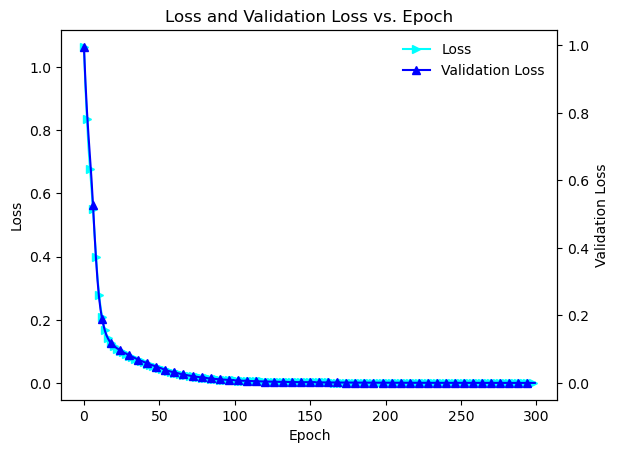

In [9]:
import matplotlib.pyplot as plt 

# Plot the validation loss vs. epoch
fig, ax1 = plt.subplots()
# Dataset 1
ax1.plot(history_cc.history['loss'], marker='>', label='Loss', markevery=2, c='cyan')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Create a twin y-axis
ax2 = ax1.twinx()

# Dataset 1 validation loss
ax2.plot(history_cc.history['val_loss'], marker='^', label='Validation Loss', markevery=6, c='b')
ax2.set_ylabel('Validation Loss')

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', frameon=False)

plt.title('Loss and Validation Loss vs. Epoch')
plt.show()



In [10]:
history_cc.history['loss']

[1.0630778074264526,
 0.9355623126029968,
 0.834041178226471,
 0.7467390298843384,
 0.6784150004386902,
 0.616565465927124,
 0.5491500496864319,
 0.47425439953804016,
 0.39906349778175354,
 0.33302047848701477,
 0.2799934148788452,
 0.24046052992343903,
 0.208967387676239,
 0.18514059484004974,
 0.16681066155433655,
 0.1525738388299942,
 0.14128318428993225,
 0.13260963559150696,
 0.12582208216190338,
 0.1202227845788002,
 0.11631190031766891,
 0.112779900431633,
 0.1081671267747879,
 0.10557010769844055,
 0.10261809825897217,
 0.09969358891248703,
 0.09683582186698914,
 0.09422474354505539,
 0.09130155295133591,
 0.08904195576906204,
 0.08714153617620468,
 0.08487176150083542,
 0.08185714483261108,
 0.07974772900342941,
 0.0775308832526207,
 0.07552044093608856,
 0.07299473881721497,
 0.07086824625730515,
 0.0690331757068634,
 0.06696046888828278,
 0.06521788984537125,
 0.06343162804841995,
 0.06130194664001465,
 0.05954770743846893,
 0.057760678231716156,
 0.05577149614691734,
 0.055

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


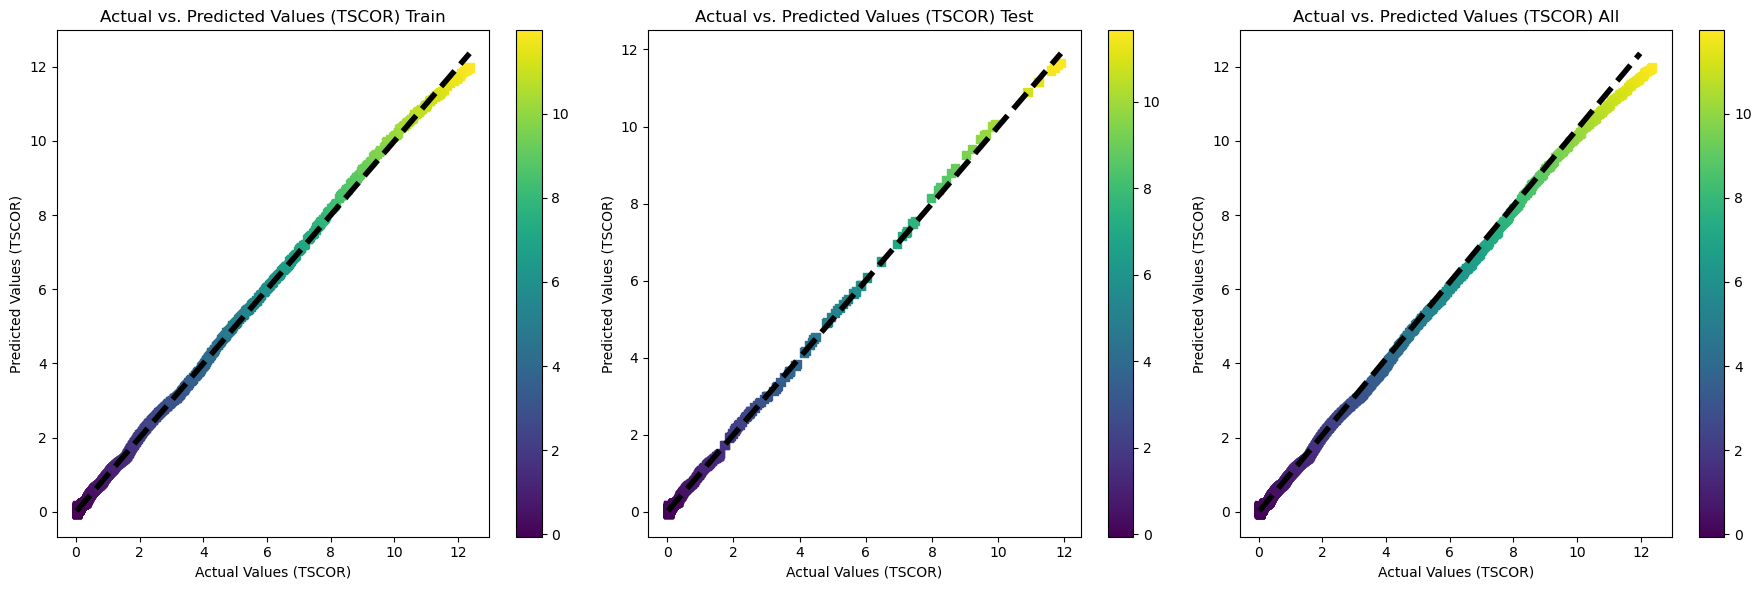

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Predict on the full dataset with the updated model
y_pred = model_regularized_dropout.predict(inputs_norm)

# Inverse transform the predicted values to get the original scale for filtered data
# Make predictions on the training and test data
y_pred_train = scaler_y.inverse_transform(model_regularized_dropout.predict(X_train))
y_pred_test = scaler_y.inverse_transform(model_regularized_dropout.predict(X_test))
y_pred_all =scaler_y.inverse_transform(y_pred) 


y_train=scaler_y.inverse_transform(y_train)
y_test=scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the predictions for both train and test sets

# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 0], y_pred_train[:, 0], c=y_pred_train[:, 0], cmap='viridis', marker='s')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 0], y_pred_test[:, 0], c=y_pred_test[:, 0], cmap='viridis', marker='s')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 0], y_pred_all[:, 0], c=y_pred_all[:, 0], cmap='viridis', marker='s')
plt.plot([y[:, 0].min(), y_pred_all[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

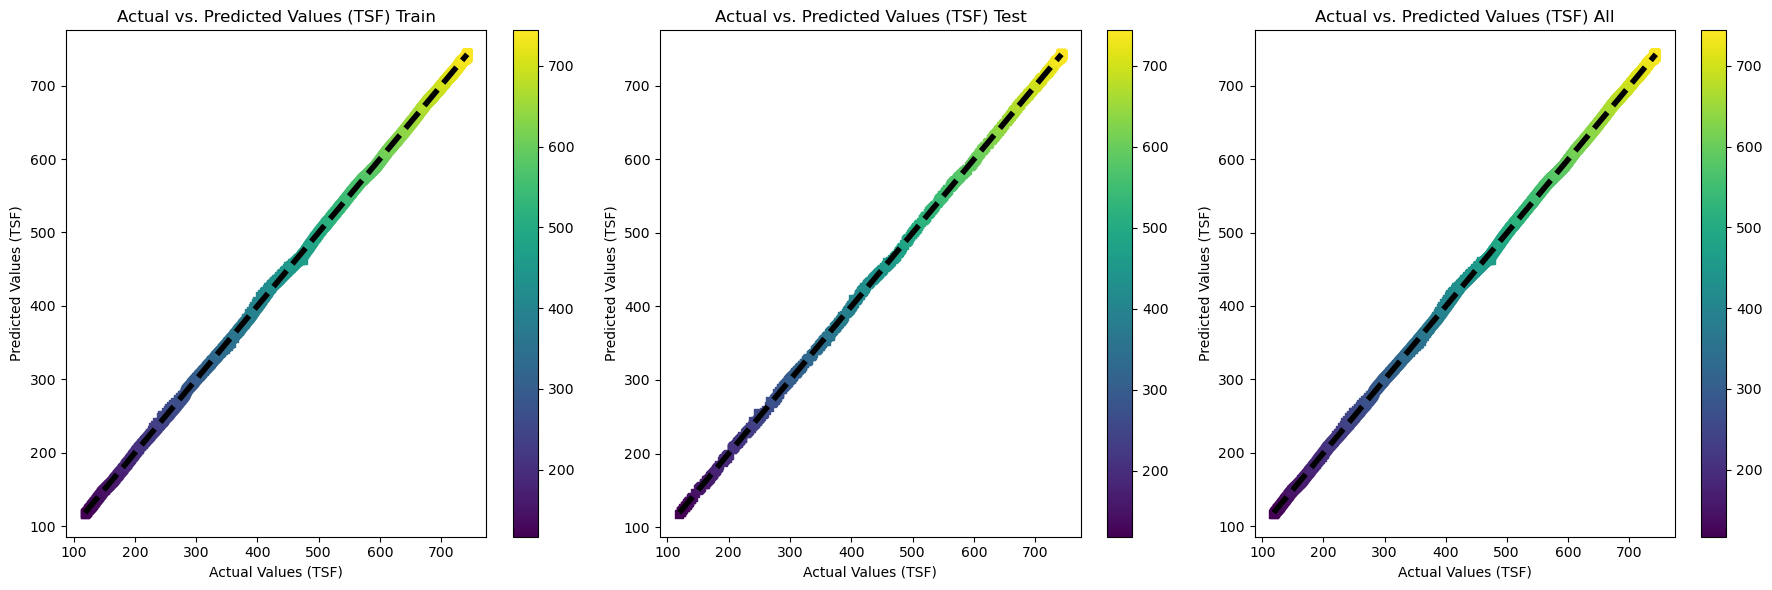

In [12]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 1], y_pred_train[:, 1], c=y_pred_train[:, 1], cmap='viridis', marker='s')
plt.plot([y_train[:, 1].min(), y_train[:, 1].max()], [y_train[:, 1].min(), y_train[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_test[:, 1], c=y_pred_test[:, 1], cmap='viridis', marker='s')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 1], y_pred_all[:, 1], c=y_pred_all[:, 1], cmap='viridis', marker='s')
plt.plot([y[:, 1].min(), y_pred_all[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) All')
plt.colorbar()

plt.tight_layout()
plt.show()

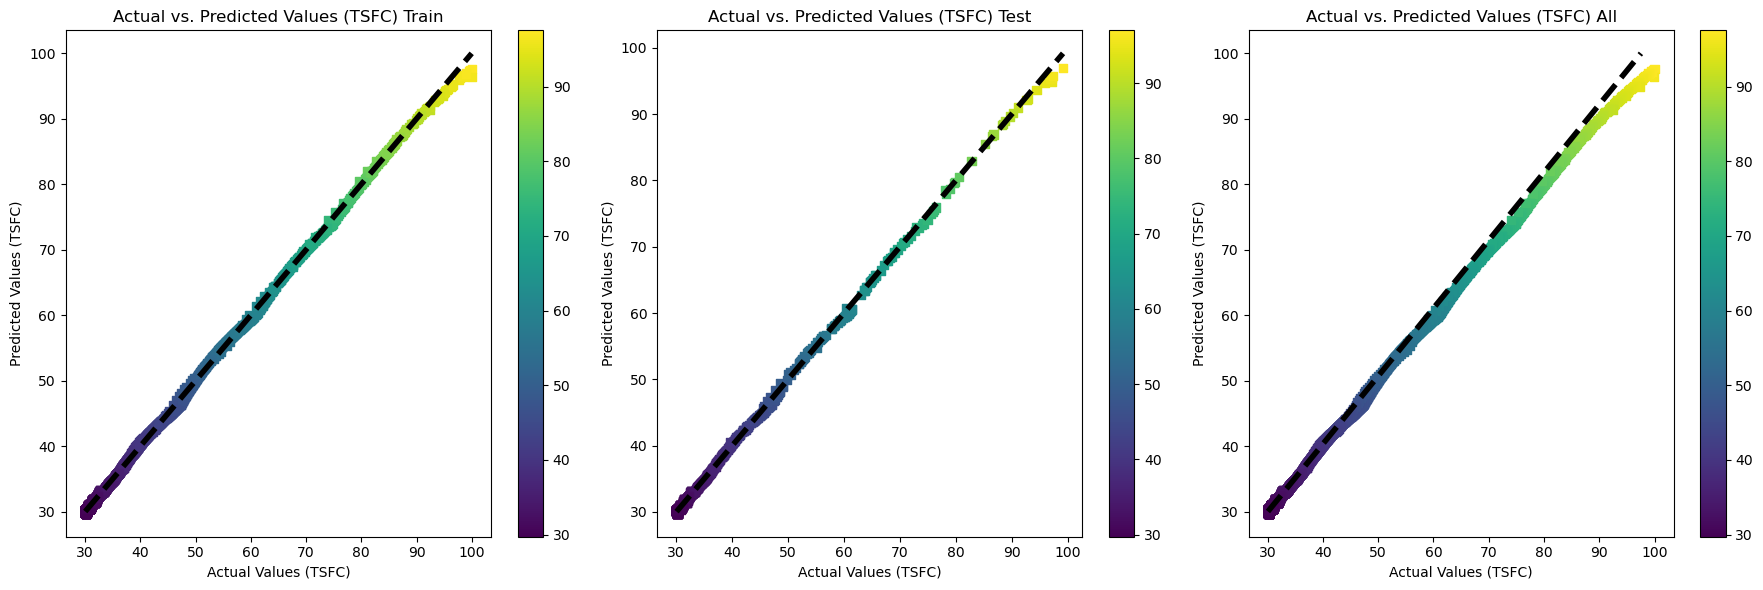

In [13]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 2], y_pred_train[:, 2], c=y_pred_train[:, 2], cmap='viridis', marker='s')
plt.plot([y_train[:, 2].min(), y_train[:, 2].max()], [y_train[:, 2].min(), y_train[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 2], y_pred_test[:, 2], c=y_pred_test[:, 2], cmap='viridis', marker='s')
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 2], y_pred_all[:, 2], c=y_pred_all[:, 2], cmap='viridis', marker='s')
plt.plot([y[:, 2].min(), y_pred_all[:, 2].max()], [y[:, 2].min(), y[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

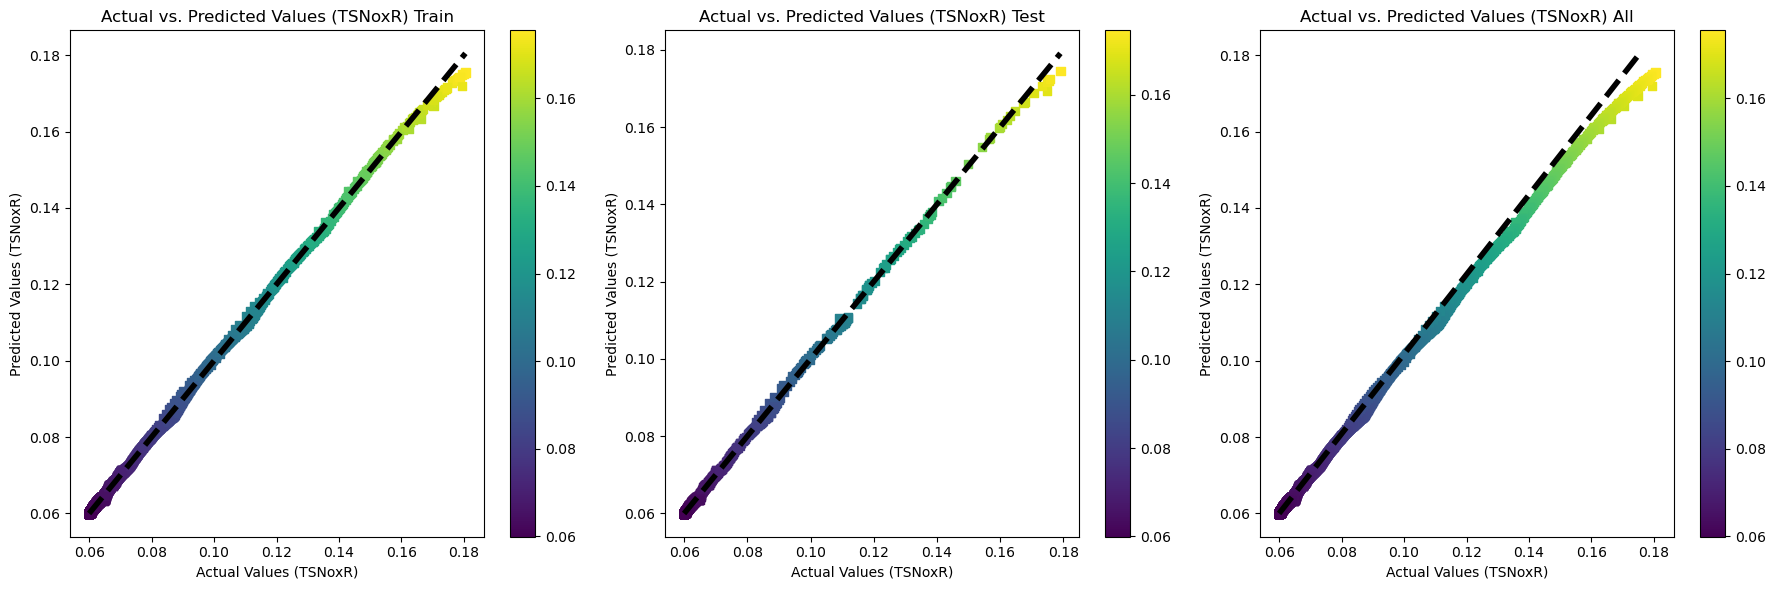

In [14]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 3], y_pred_train[:, 3], c=y_pred_train[:, 3], cmap='viridis', marker='s')
plt.plot([y_train[:, 3].min(), y_train[:, 3].max()], [y_train[:, 3].min(), y_train[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 3], y_pred_test[:, 3], c=y_pred_test[:, 3], cmap='viridis', marker='s')
plt.plot([y_test[:, 3].min(), y_test[:, 3].max()], [y_test[:, 3].min(), y_test[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 3], y_pred_all[:, 3], c=y_pred_all[:, 3], cmap='viridis', marker='s')
plt.plot([y[:, 3].min(), y_pred_all[:, 3].max()], [y[:, 3].min(), y[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

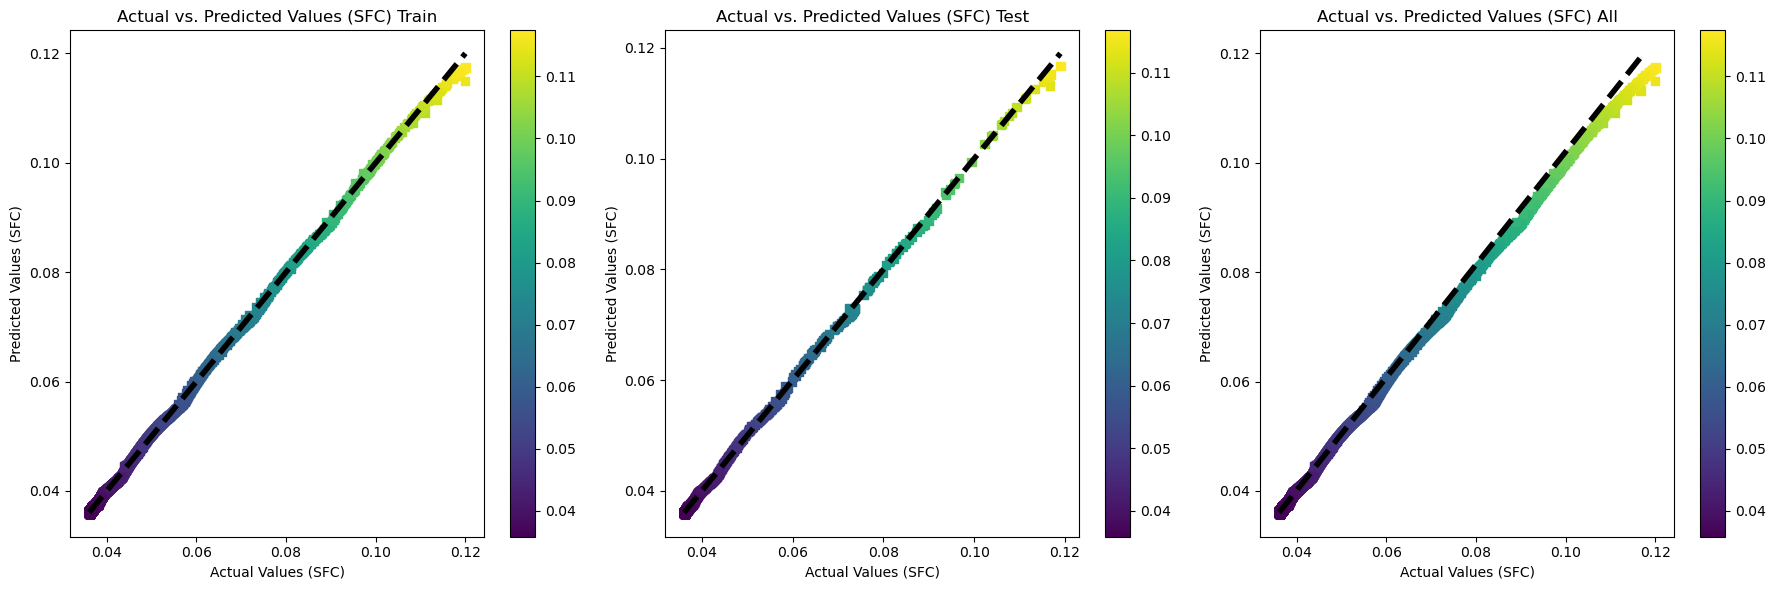

In [15]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))
#y = Data[['TSCOR','TSF','TSFC','','']].values

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 4], y_pred_train[:, 4], c=y_pred_train[:, 4], cmap='viridis', marker='s')
plt.plot([y_train[:, 4].min(), y_train[:, 4].max()], [y_train[:, 4].min(), y_train[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 4], y_pred_test[:, 4], c=y_pred_test[:, 4], cmap='viridis', marker='s')
plt.plot([y_test[:, 4].min(), y_test[:, 4].max()], [y_test[:, 4].min(), y_test[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 4], y_pred_all[:, 4], c=y_pred_all[:, 4], cmap='viridis', marker='s')
plt.plot([y[:, 4].min(), y_pred_all[:, 4].max()], [y[:, 4].min(), y[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


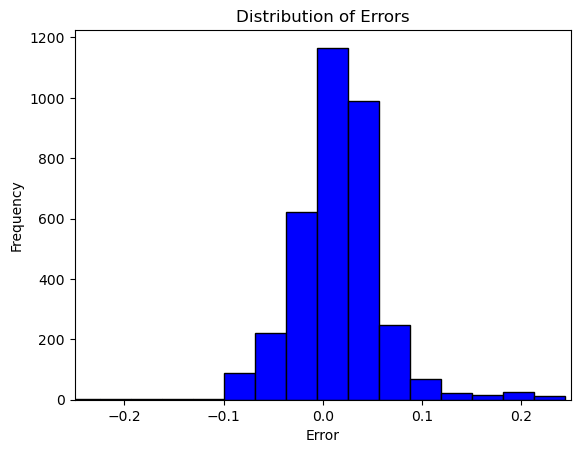

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 0]
actual_values = y[:, 0]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-0.25, 0.25)  # Set the x-axis range from -3 to 3

plt.show()

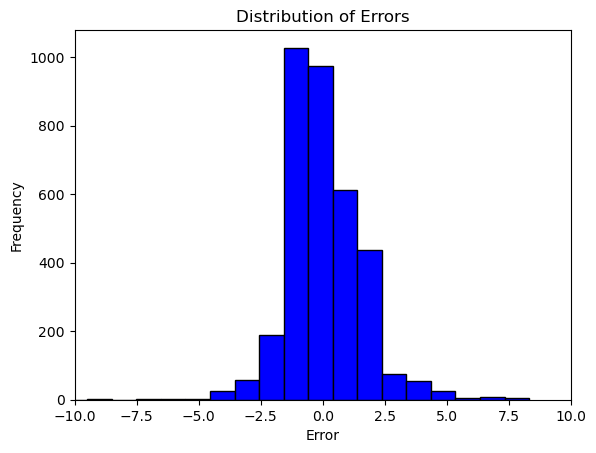

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 1]
actual_values = y[:, 1]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-10, 10)  # Set the x-axis range from -3 to 3

plt.show()

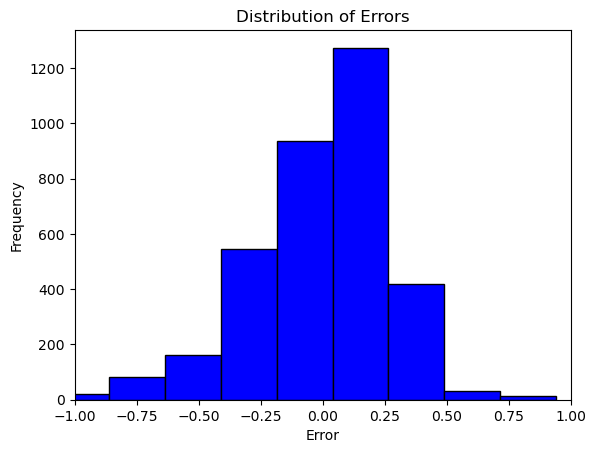

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 2]
actual_values = y[:, 2]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1, 1)  # Set the x-axis range from -3 to 3

plt.show()

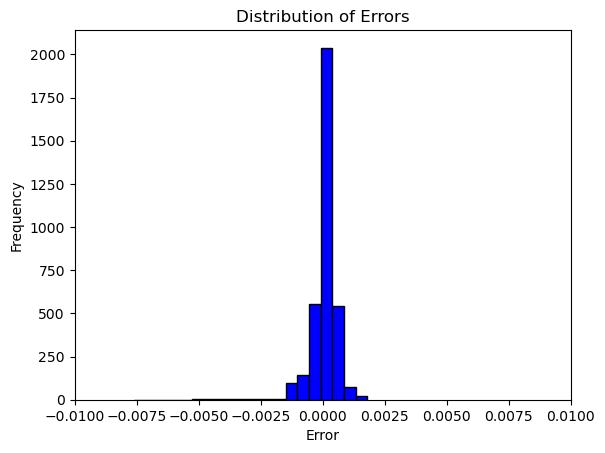

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 3]
actual_values = y[:, 3]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1e-2, 1e-2)  # Set the x-axis range from -3 to 3

plt.show()

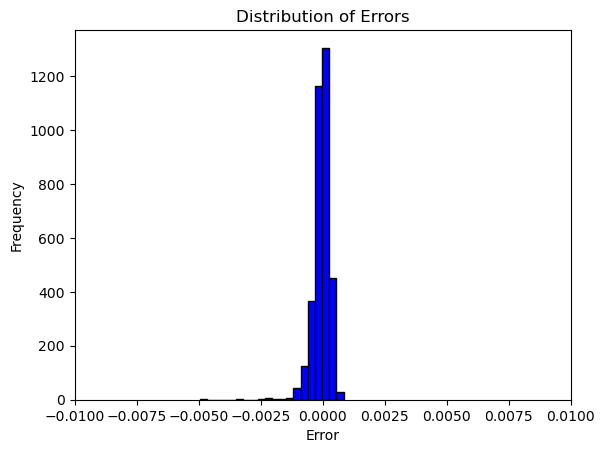

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have trained your DNN model and made predictions on the test set
# Replace these with your actual predicted and actual values
predicted_values = y_pred_all[:, 4]
actual_values = y[:, 4]

# Calculate the error between predicted and actual values
errors = (predicted_values - actual_values)

# Plot the distribution of errors
plt.hist(errors, bins=20, color='blue', edgecolor='black')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.xlim(-1e-2, 1e-2)  # Set the x-axis range from -3 to 3

plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 0], y_pred_test[:, 0])
mse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
rmse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0], squared=False)
mae = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])

print("Test Set Metrics:")
print("R2 Score: (TSCOR)", r2)
print("Mean Squared Error: (TSCOR)", mse)
print("Root Mean Squared Error:(TSCOR)", rmse)
print("Mean Absolute Error:(TSCOR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 0], y_pred_train[:, 0])
mse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
rmse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0], squared=False)
mae_train = mean_absolute_error(y_train[:, 0], y_pred_train[:, 0])

print("\nTrain Set Metrics:")
print("R2 Score: (TSCOR)", r2_train)
print("Mean Squared Error: (TSCOR)", mse_train)
print("Root Mean Squared Error: (TSCOR)", rmse_train)
print("Mean Absolute Error:(TSCOR)", mae_train)



Test Set Metrics:
R2 Score: (TSCOR) 0.9993571937388765
Mean Squared Error: (TSCOR) 0.0024436001237707096
Root Mean Squared Error:(TSCOR) 0.04943278389662785
Mean Absolute Error:(TSCOR) 0.03581488611212918

Train Set Metrics:
R2 Score: (TSCOR) 0.9994722547360914
Mean Squared Error: (TSCOR) 0.002541874152711569
Root Mean Squared Error: (TSCOR) 0.050417002615303984
Mean Absolute Error:(TSCOR) 0.03540714033114113


In [23]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 1], y_pred_test[:, 1])
mse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
rmse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1], squared=False)
mae = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])

print("Test Set Metrics:")
print("R2 Score: (TSF)", r2)
print("Mean Squared Error: (TSF)", mse)
print("Root Mean Squared Error:(TSF)", rmse)
print("Mean Absolute Error:(TSF)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 1], y_pred_train[:, 1])
mse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
rmse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1], squared=False)
mae_train = mean_absolute_error(y_train[:, 1], y_pred_train[:, 1])

print("\nTrain Set Metrics:")
print("R2 Score: (TSF)", r2_train)
print("Mean Squared Error: (TSF)", mse_train)
print("Root Mean Squared Error: (TSF)", rmse_train)
print("Mean Absolute Error:(TSF)", mae_train)

Test Set Metrics:
R2 Score: (TSF) 0.9999391596572141
Mean Squared Error: (TSF) 2.131204098956326
Root Mean Squared Error:(TSF) 1.4598644111547916
Mean Absolute Error:(TSF) 1.130457500724411

Train Set Metrics:
R2 Score: (TSF) 0.9999332694702951
Mean Squared Error: (TSF) 2.355216651870116
Root Mean Squared Error: (TSF) 1.534671512692575
Mean Absolute Error:(TSF) 1.1470638049150848


In [24]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 3], y_pred_test[:, 3])
mse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3])
rmse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3], squared=False)
mae = mean_absolute_error(y_test[:, 3], y_pred_test[:, 3])

print("Test Set Metrics:")
print("R2 Score: (TSNoxR)", r2)
print("Mean Squared Error: (TSNoxR)", mse)
print("Root Mean Squared Error:(TSNoxR)", rmse)
print("Mean Absolute Error:(TSNoxR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 3], y_pred_train[:, 3])
mse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3])
rmse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3], squared=False)
mae_train = mean_absolute_error(y_train[:, 3], y_pred_train[:, 3])

print("\nTrain Set Metrics:")
print("R2 Score: (TSNoxR)", r2_train)
print("Mean Squared Error: (TSNoxR)", mse_train)
print("Root Mean Squared Error: (TSNoxR)", rmse_train)
print("Mean Absolute Error:(TSNoxR)", mae_train)

Test Set Metrics:
R2 Score: (TSNoxR) 0.9994404204687335
Mean Squared Error: (TSNoxR) 3.1921085626591455e-07
Root Mean Squared Error:(TSNoxR) 0.0005649874832825189
Mean Absolute Error:(TSNoxR) 0.0003256236787767454

Train Set Metrics:
R2 Score: (TSNoxR) 0.9994798837215467
Mean Squared Error: (TSNoxR) 2.7842386570320677e-07
Root Mean Squared Error: (TSNoxR) 0.0005276588535248952
Mean Absolute Error:(TSNoxR) 0.00031494578733476543


In [25]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 4], y_pred_test[:, 4])
mse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4])
rmse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4], squared=False)
mae = mean_absolute_error(y_test[:, 4], y_pred_test[:, 4])

print("Test Set Metrics:")
print("R2 Score: (TSFCC)", r2)
print("Mean Squared Error: (TSFCC)", mse)
print("Root Mean Squared Error:(TSFCC)", rmse)
print("Mean Absolute Error:(TSFCC)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 4], y_pred_train[:, 4])
mse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4])
rmse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4], squared=False)
mae_train = mean_absolute_error(y_train[:, 4], y_pred_train[:, 4])

print("\nTrain Set Metrics:")
print("R2 Score: (TSFCC)", r2_train)
print("Mean Squared Error: (TSFCC)", mse_train)
print("Root Mean Squared Error: (TSFCC)", rmse_train)
print("Mean Absolute Error:(TSFCC)", mae_train)



Test Set Metrics:
R2 Score: (TSFCC) 0.9995278066643066
Mean Squared Error: (TSFCC) 1.3717956125803126e-07
Root Mean Squared Error:(TSFCC) 0.0003703775928131064
Mean Absolute Error:(TSFCC) 0.0002520067826402342

Train Set Metrics:
R2 Score: (TSFCC) 0.9995666480722089
Mean Squared Error: (TSFCC) 1.1893159682451589e-07
Root Mean Squared Error: (TSFCC) 0.000344864606511767
Mean Absolute Error:(TSFCC) 0.00023749375782976153


In [32]:
model_regularized_dropout.save('DNN-DualBypass.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

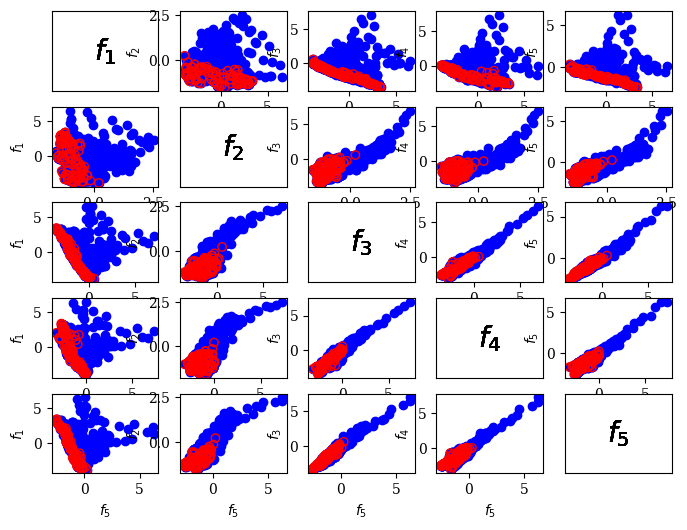

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.evaluator import Evaluator
from pymoo.core.problem import Problem
from pymoo.core.termination import NoTermination
from pymoo.visualization.scatter import Scatter
from pymoo.problems.static import StaticProblem


# Define the multi-objective function using the trained neural network
def multi_objective_function(x):
    inputs_test_norm = scaler_x.transform(np.array(x).reshape(1, -1))
    #y_pred = scaler_y.inverse_transform(model_regularized_dropout.predict(inputs_test_norm))
    y_pred = model_regularized_dropout.predict(inputs_test_norm)
    return (y_pred[0, 0], -y_pred[0, 1],y_pred[0, 2],y_pred[0, 3],y_pred[0, 4])

problem = Problem(n_var=6, n_obj=5, n_constr=0, xl=[0.01, 0.01, 1.5, 1.5, 1.5, 1600], xu=[0.3,0.3,8, 3.5, 7, 2175])

# Create the algorithm object
algorithm = NSGA2(pop_size=100)

# Let the algorithm object never terminate and let the loop control it
termination = NoTermination()

# Create an algorithm object that never terminates
algorithm.setup(problem, termination=termination)

# Fix the random seed manually
np.random.seed(1)

# Initialize plot
plot = Scatter()

# Until the algorithm has not terminated
for n_gen in range(10):
    # Ask the algorithm for the next solution to be evaluated
    pop = algorithm.ask()

    # Get the design space values of the algorithm
    X = pop.get("X")

    # Evaluate objectives using the multi-objective function
    F = np.array([multi_objective_function(x) for x in X])
    static = StaticProblem(problem, F=F)
    Evaluator().eval(static, pop)

    # Returned the evaluated individuals which have been evaluated or even modified
    algorithm.tell(infills=pop)

    # Update plot with current generation
    plot.add(pop.get("F"), color="blue")

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

# Obtain the result objective from the algorithm
res = algorithm.result()

# Calculate a hash to show that all executions end with the same result
print("hash", res.F.sum())

# Retrieve the optimal inputs from the optimization result
optimal_inputs = res.X
print("Optimal Inputs:")
for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()


In [27]:

# Add Pareto front to plot
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)

for input_values in optimal_inputs:
    print(input_values)

# Add final result to plot
plot.add(res.F, facecolor="none", edgecolor="red")

# Show plot
plot.show()

[1.37266696e-01 1.27110876e-02 3.12522879e+00 3.29285880e+00
 3.68899667e+00 2.16648187e+03]
[2.93168013e-01 1.21516504e-02 7.42142552e+00 1.84454503e+00
 1.76603420e+00 1.65363470e+03]
[2.36672799e-02 2.11317432e-02 4.29813278e+00 2.06017743e+00
 1.80603107e+00 2.17379727e+03]
[2.64677983e-02 4.21286857e-02 1.52186387e+00 1.61963524e+00
 3.96099929e+00 2.14590957e+03]
[2.32479216e-02 1.04774996e-02 5.57535993e+00 1.65485767e+00
 1.71216850e+00 1.80001713e+03]
[2.92934066e-01 1.80985061e-02 7.23384588e+00 1.88773745e+00
 1.76603420e+00 1.60903624e+03]
[2.83822589e-02 4.10625563e-02 4.35100789e+00 2.96525244e+00
 3.34061594e+00 2.13746206e+03]
[9.82212199e-02 1.27110876e-02 4.12593379e+00 2.19290122e+00
 3.04278707e+00 2.13403547e+03]
[4.63737077e-02 4.21286857e-02 1.52186387e+00 1.61963524e+00
 3.96099929e+00 2.14590957e+03]
[2.27443648e-02 4.11732974e-02 3.07669690e+00 2.96184987e+00
 4.24885740e+00 2.13837317e+03]
[1.65243529e-01 1.16222046e-02 3.03867686e+00 2.68642447e+00
 1.524502

In [28]:
import pandas as pd

# Assuming res.F contains the optimal outputs and res.X contains the optimal inputs
optimal_inputs = res.X
optimal_outputs = scaler_y.inverse_transform(np.abs(res.F)) 
df_optimal_inputs = pd.DataFrame(optimal_inputs, columns=['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT'])
df_optimal_outputs = pd.DataFrame(optimal_outputs, columns=['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC'])
Optimaldata=pd.concat([df_optimal_inputs,df_optimal_outputs],axis=1)

# Write the combined optimal data to an Excel file
Optimaldata.to_excel("Optimalsbypass.xlsx") 



In [29]:
res.F

array([[-3.8380847 ,  0.22244227,  0.55083197,  0.01640594,  0.26434028],
       [ 3.38675117, -1.18430138, -3.4931829 , -2.61126113, -2.50163221],
       [-3.69083643, -0.88257825, -0.05822074,  0.04578476, -0.23986126],
       [ 2.07017803, -0.99526906, -2.7419138 , -3.13271141, -1.64884281],
       [ 0.45170826, -1.54864681, -1.56198013, -0.83706659, -1.41343606],
       [ 3.27986622, -1.21665049, -3.40404272, -2.53297997, -2.51359344],
       [-3.49982095, -0.13648948, -0.29028714, -0.16342263,  0.07840804],
       [-3.67503023, -0.4304345 ,  0.19748636, -0.137242  , -0.11315434],
       [ 1.37038231, -0.94007778, -2.50236154, -2.84189272, -1.56625187],
       [-1.48182464, -0.3889924 , -1.36787963, -1.21077776, -0.42329434],
       [-2.47207499, -0.48300925, -0.90793848, -1.12253892, -0.56719005],
       [-0.90749234, -0.76775932, -1.72428858, -1.92225993, -1.11270928],
       [ 2.69400787, -1.10291862, -3.07706738, -2.23934579, -2.28084278],
       [-3.56034184, -0.86437571, -0.1

In [30]:
model_regularized_dropout.predict(scaler_x.transform(optimal_inputs))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[-3.8380842 , -0.22244224,  0.5508319 ,  0.01640594,  0.2643402 ],
       [ 3.3867514 ,  1.1843014 , -3.4931827 , -2.6112611 , -2.5016325 ],
       [-3.6908364 ,  0.8825779 , -0.05822077,  0.04578471, -0.2398612 ],
       [ 2.070178  ,  0.9952693 , -2.741914  , -3.1327114 , -1.6488432 ],
       [ 0.45170826,  1.5486466 , -1.5619802 , -0.83706653, -1.4134359 ],
       [ 3.2798662 ,  1.2166506 , -3.4040425 , -2.5329802 , -2.5135934 ],
       [-3.499821  ,  0.13648939, -0.29028717, -0.16342258,  0.07840817],
       [-3.6750302 ,  0.43043455,  0.19748625, -0.13724184, -0.11315425],
       [ 1.3703823 ,  0.9400778 , -2.5023618 , -2.8418925 , -1.5662519 ],
       [-1.4818246 ,  0.3889924 , -1.3678796 , -1.2107778 , -0.42329428],
       [-2.4720745 ,  0.4830092 , -0.90793836, -1.1225384 , -0.5671901 ],
       [-0.9074927 ,  0.7677592 , -1.7242883 , -1.9222599 , -1.1127092 ],
       [ 2.694008  ,  1.1029185 , -3.0770674 , -2.239346  , -2.280843  ],
       [-3.5603414 ,  0.8643758 , -0.1

In [31]:
optimal_inputs

array([[1.37266696e-01, 1.27110876e-02, 3.12522879e+00, 3.29285880e+00,
        3.68899667e+00, 2.16648187e+03],
       [2.93168013e-01, 1.21516504e-02, 7.42142552e+00, 1.84454503e+00,
        1.76603420e+00, 1.65363470e+03],
       [2.36672799e-02, 2.11317432e-02, 4.29813278e+00, 2.06017743e+00,
        1.80603107e+00, 2.17379727e+03],
       [2.64677983e-02, 4.21286857e-02, 1.52186387e+00, 1.61963524e+00,
        3.96099929e+00, 2.14590957e+03],
       [2.32479216e-02, 1.04774996e-02, 5.57535993e+00, 1.65485767e+00,
        1.71216850e+00, 1.80001713e+03],
       [2.92934066e-01, 1.80985061e-02, 7.23384588e+00, 1.88773745e+00,
        1.76603420e+00, 1.60903624e+03],
       [2.83822589e-02, 4.10625563e-02, 4.35100789e+00, 2.96525244e+00,
        3.34061594e+00, 2.13746206e+03],
       [9.82212199e-02, 1.27110876e-02, 4.12593379e+00, 2.19290122e+00,
        3.04278707e+00, 2.13403547e+03],
       [4.63737077e-02, 4.21286857e-02, 1.52186387e+00, 1.61963524e+00,
        3.96099929e+00, 